## Objeto del trabajo

Se trata de implementar el algoritmo KMeans para localizar las coordenadas de mayor probabilidad de ocurrencia de terremotos en España.
Se parte de una base de datos obtenida en la web de IGN (Instituto Geográfico Nacional) que se puede obtener actualizada en : https://www.ign.es/web/ign/portal/sis-catalogo-terremotos
Nos bajamos la relación de terremotos a partir del año 1900 en un archivo denominado 'terremotos.csv'

### Procedimiento a seguir

#### Creamos un df de pandas (df) donde cargamos terremotos.csv, (observese el uso de delimiter=;, tras inspeccionar el csv. Hacemos el procesado de los datos para adaptarlos a nuestras necesidades.

In [48]:

import pandas as pd

# Cargamos el archivo terremotos.csv a df
try:
  df = pd.read_csv('terremotos.csv', delimiter=";")
except FileNotFoundError:
  print("Error: 'terremotos.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
  exit() 
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check the file format.")
  exit()
except Exception as e:
  print(f"An unexpected error occurred: {e}")
  exit()


df.columns = ['Evento','Fecha','Hora','Latitud','Longitud','Profundidad(km)','Intensidad','Magnitud','Tipo Magnitud','Localizacion']

# Convertimos 'Magnitud'a campo numérico
df['Magnitud'] = pd.to_numeric(df['Magnitud'], errors='coerce')

# Eliminamos filas con valor nulo de  'Magnitud' 
df = df.dropna(subset=['Magnitud'])

# Visualizamos el df
df

C:\Users\quini\AppData\Local\Temp\ipykernel_2180\3072861869.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('terremotos.csv', delimiter=";")


,Evento,Fecha,Hora,Latitud,Longitud,Profundidad(km),Intensidad,Magnitud,Tipo Magnitud,Localizacion
7,es1900rfpnb,02/09/1900,23:40:00,28.3300,-16.5000,0.0,III,3.6,13,"S La Orotava,Valle de la Orotava.TF"
43,es1902vjkvj,01/11/1902,00:00:00,28.1000,-15.6900,0.0,IV,3.5,13,"Agaete.GC,Isla de Gran Canaria"
71,2561,23/09/1903,00:00:00,28.6450,-17.8220,0.0,VI,5.0,13,"O Santa Cruz de la Palma,Isla de La Palma"
174,2668,23/03/1908,22:15:00,28.3430,-16.6980,0.0,III,3.5,13,"S Cueva del Viento,Valle de Icod.TF"
176,2670,26/03/1908,23:17:00,28.3430,-16.6980,0.0,IV,4.2,13,"S Cueva del Viento,Valle de Icod.TF"
...,...,...,...,...,...,...,...,...,...,...
189484,es2024xensv,25/11/2024,17:06:19,36.8912,-4.6011,5.0,,2.0,4,SW VILLANUEVA DE LA CONCEPCIÓN
189485,es2024xenum,25/11/2024,17:08:14,43.0359,0.1939,2.0,,1.7,4,S BAGNERES DE BIGORRE.FRA
189486,es2024xeojb,25/11/2024,17:25:15,27.9398,-15.3153,20.0,,1.8,4,SE TELDE.IGC
189487,es2024xerms,25/11/2024,19:00:26,36.9129,-3.1006,0.0,,1.0,4,NE MURTAS.GR


In [50]:
# prompt: calcula maxima y  minima magnitud

max_magnitud = df['Magnitud'].max()
min_magnitud = df['Magnitud'].min()

print(f"Máxima magnitud: {max_magnitud}")
print(f"Mínima magnitud: {min_magnitud}")

Máxima magnitud: 8.2
Mínima magnitud: -2.0


In [52]:
# Eliminamos registros con magnitud<=0

df = df[df['Magnitud'] > 0]

df

,Evento,Fecha,Hora,Latitud,Longitud,Profundidad(km),Intensidad,Magnitud,Tipo Magnitud,Localizacion
7,es1900rfpnb,02/09/1900,23:40:00,28.3300,-16.5000,0.0,III,3.6,13,"S La Orotava,Valle de la Orotava.TF"
43,es1902vjkvj,01/11/1902,00:00:00,28.1000,-15.6900,0.0,IV,3.5,13,"Agaete.GC,Isla de Gran Canaria"
71,2561,23/09/1903,00:00:00,28.6450,-17.8220,0.0,VI,5.0,13,"O Santa Cruz de la Palma,Isla de La Palma"
174,2668,23/03/1908,22:15:00,28.3430,-16.6980,0.0,III,3.5,13,"S Cueva del Viento,Valle de Icod.TF"
176,2670,26/03/1908,23:17:00,28.3430,-16.6980,0.0,IV,4.2,13,"S Cueva del Viento,Valle de Icod.TF"
...,...,...,...,...,...,...,...,...,...,...
189484,es2024xensv,25/11/2024,17:06:19,36.8912,-4.6011,5.0,,2.0,4,SW VILLANUEVA DE LA CONCEPCIÓN
189485,es2024xenum,25/11/2024,17:08:14,43.0359,0.1939,2.0,,1.7,4,S BAGNERES DE BIGORRE.FRA
189486,es2024xeojb,25/11/2024,17:25:15,27.9398,-15.3153,20.0,,1.8,4,SE TELDE.IGC
189487,es2024xerms,25/11/2024,19:00:26,36.9129,-3.1006,0.0,,1.0,4,NE MURTAS.GR


In [54]:
# Volvemos a calcular maxima y minima magnitud

# Calculate the maximum and minimum magnitudes
max_magnitud = df['Magnitud'].max()
min_magnitud = df['Magnitud'].min()

print(f"Máxima magnitud: {max_magnitud}")
print(f"Mínima magnitud: {min_magnitud}")

Máxima magnitud: 8.2
Mínima magnitud: 0.1


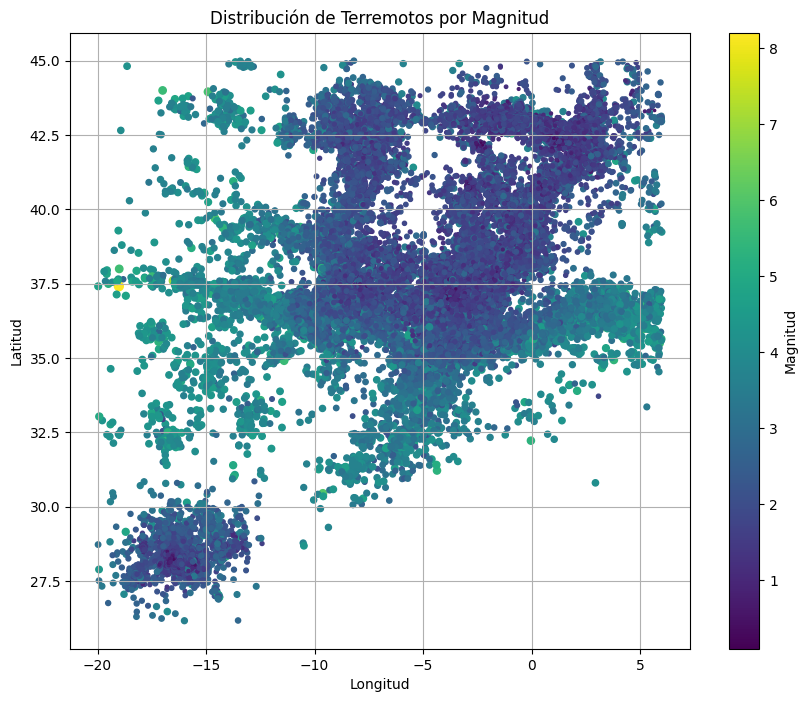

In [56]:
# Representamos grafica en matplotlib Latitud y longitud con magnitud en escala de color

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
plt.scatter(df['Longitud'], df['Latitud'], c=df['Magnitud'], cmap='viridis', s=df['Magnitud']*5) # Use magnitude for color and marker size

# Customize the plot
plt.colorbar(label='Magnitud')  # Add a colorbar with label
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Terremotos por Magnitud')
plt.grid(True)  # Add gridlines

# Show the plot
plt.show()

#### Para centrar un poco más los datos procedemos a seleccionar sólo los terremotos con magnitud mayor o igual  de Magnitud 3

Máxima magnitud: 8.2
Mínima magnitud: 3.0


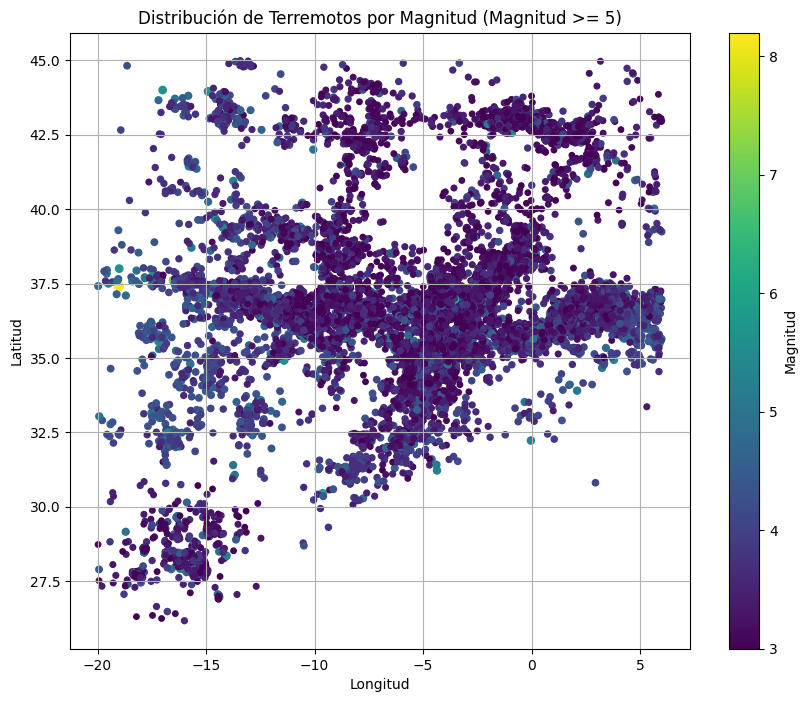

In [59]:

# Eliminamos filas con magnitud< 3
df = df[df['Magnitud'] >= 3]

# Vemos el df
df

# Calculamos la máxima y mínima magnitud
max_magnitud = df['Magnitud'].max()
min_magnitud = df['Magnitud'].min()

print(f"Máxima magnitud: {max_magnitud}")
print(f"Mínima magnitud: {min_magnitud}")


# Creamos un gráfico donde veremos menos puntos

plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
plt.scatter(df['Longitud'], df['Latitud'], c=df['Magnitud'], cmap='viridis', s=df['Magnitud']*5) # Use magnitude for color and marker size

# Customize the plot
plt.colorbar(label='Magnitud')  
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Terremotos por Magnitud (Magnitud >= 5)')
plt.grid(True)  

# Show the plot
plt.show()

In [61]:
# Aplicamos maxminscaler a Latitud y Longitud

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Latitud', 'Longitud']] = scaler.fit_transform(df[['Latitud', 'Longitud']])

df

C:\Users\quini\AppData\Local\Temp\ipykernel_2180\373785112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Latitud', 'Longitud']] = scaler.fit_transform(df[['Latitud', 'Longitud']])


,Evento,Fecha,Hora,Latitud,Longitud,Profundidad(km),Intensidad,Magnitud,Tipo Magnitud,Localizacion
7,es1900rfpnb,02/09/1900,23:40:00,0.114755,0.133765,0.0,III,3.6,13,"S La Orotava,Valle de la Orotava.TF"
43,es1902vjkvj,01/11/1902,00:00:00,0.102530,0.164951,0.0,IV,3.5,13,"Agaete.GC,Isla de Gran Canaria"
71,2561,23/09/1903,00:00:00,0.131498,0.082866,0.0,VI,5.0,13,"O Santa Cruz de la Palma,Isla de La Palma"
174,2668,23/03/1908,22:15:00,0.115446,0.126142,0.0,III,3.5,13,"S Cueva del Viento,Valle de Icod.TF"
176,2670,26/03/1908,23:17:00,0.115446,0.126142,0.0,IV,4.2,13,"S Cueva del Viento,Valle de Icod.TF"
...,...,...,...,...,...,...,...,...,...,...
189330,es2024wqqot,18/11/2024,02:41:18,0.525279,0.587579,64.0,,3.9,3,ALBORÁN OESTE
189339,es2024wscrs,18/11/2024,21:56:23,0.556485,0.979105,0.0,,3.5,6,SE BEJAIA.ARG
189425,es2024wzkio,22/11/2024,21:43:27,0.083688,0.065756,31.0,,3.0,4,W FRONTERA.IHI
189475,es2024xdjsy,25/11/2024,01:57:13,0.526523,0.459647,30.0,,3.0,4,GOLFO DE CÁDIZ


C:\Users\quini\anaconda3\envs\prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\quini\anaconda3\envs\prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\quini\anaconda3\envs\prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\quini\anaconda3\envs\prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

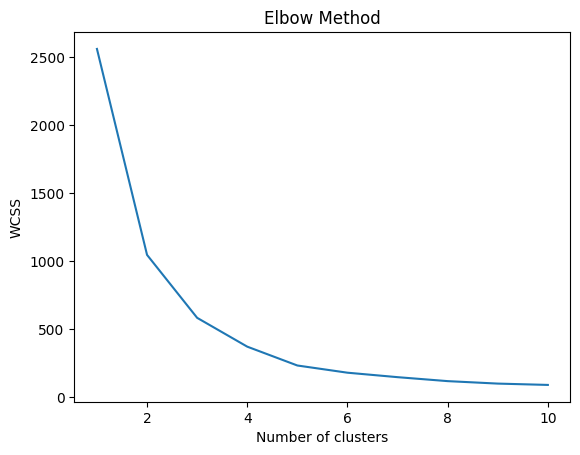

El número óptimo de centroides para aplicar k-NN es: 3


In [63]:
# Calcula el numero de centroides para aplicar KMeans a Latitud y Longitud

import numpy as np

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Latitud', 'Longitud']])
    wcss.append(kmeans.inertia_)

# Visualizamos
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Número de centroides óptimo es 3
optimal_k = 3 #  Replace with the k value you determine from the elbow method plot.

print(f"El número óptimo de centroides para aplicar k-NN es: {optimal_k}")

C:\Users\quini\anaconda3\envs\prueba\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\quini\AppData\Local\Temp\ipykernel_2180\1577911518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[['Latitud', 'Longitud']])


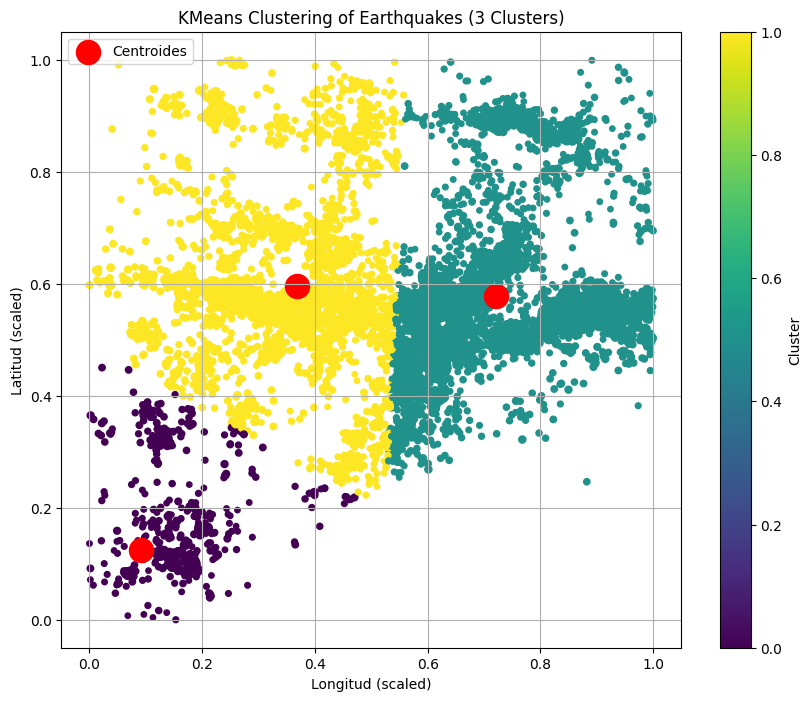

In [65]:
# Creamos KMeans con Latitud y Longitud con tres centroides y representamos los centroides en un gráfico.


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Latitud', 'Longitud']])


plt.figure(figsize=(10, 8))
plt.scatter(df['Longitud'], df['Latitud'], c=df['cluster'], cmap='viridis', s=df['Magnitud']*5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroides') # Plot centroids
plt.colorbar(label='Cluster')
plt.xlabel('Longitud (scaled)')
plt.ylabel('Latitud (scaled)')
plt.title('KMeans Clustering of Earthquakes (3 Clusters)')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# escribe Latitud y Longitud de los centroides

centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)
for i, centroid in enumerate(original_centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster 1: Latitude = 28.523293348623856, Longitude = -17.620543042813456
Cluster 2: Latitude = 37.0586754159469, Longitude = -1.2506259659969163
Cluster 3: Latitude = 37.390802972115544, Longitude = -10.411368809484053


#### Hemos obtenido las latitudes y longitudes de los tres punos donde mayor es la probabilidad que se produzca un terremoto.

### Vamos a ver los puntos representados en un mapa con Folium

In [71]:
# prompt: representa los centroides en un mapa de folium

!pip install folium

import folium
m = folium.Map(location=[20, -80], zoom_start=3)
for i, centroid in enumerate(original_centroids):
  folium.Marker(location=[centroid[0], centroid[1]],
                popup=f'Centroid {i+1}',
                icon=folium.Icon(color='red')).add_to(m)
m


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Conclusión:

#### Se observa que los puntos seleccionados por el algoritmo corresponden a una ubicación en la isla de La Palma, otra frente a las costas de Lisboa y otra frente a las costas de Almería y Murcia . Son resultados lógicos atendiendo a los puntos de encuentro entre las placas africana y europea.
#### Si utilizamos 5 centroides aparecen dos puntos más en los pirineos y en el mar de Alborán.
#### Creo que el algositimo KNmeans, siendo no supervisado, obtiene resultados válidos.